In [30]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime as dt
from pylab import rcParams
import ggplot
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

plt.subplots(figsize=(40,30))

%pylab inline
%config InlineBackend.figure_format = 'svg' 



Populating the interactive namespace from numpy and matplotlib


/Users/Feldman/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy



In [2]:

ofile = './data_set_movies.csv'
ufile1 = './usefull_cols1'
#ufile2 = './usefull_cols2'
with open(ufile1,'r') as f:
    r1 = f.readline().strip('\n').split(',')
    print(r1)
    f.close()


['color', 'director_name', 'num_critic_for_reviews', 'duration', 'gross', 'movie_title', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']


In [3]:
dfMain = pd.read_csv(ofile, header=0, sep=',')


In [4]:
df1 = dfMain[r1]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5042 entries, 0 to 5041
Data columns (total 18 columns):
color                        5023 non-null object
director_name                4938 non-null object
num_critic_for_reviews       4992 non-null float64
duration                     5027 non-null float64
gross                        4158 non-null float64
movie_title                  5042 non-null object
num_voted_users              5042 non-null int64
cast_total_facebook_likes    5042 non-null int64
facenumber_in_poster         5029 non-null float64
num_user_for_reviews         5021 non-null float64
language                     5030 non-null object
country                      5037 non-null object
content_rating               4739 non-null object
budget                       4550 non-null float64
title_year                   4934 non-null float64
imdb_score                   5042 non-null float64
aspect_ratio                 4713 non-null float64
movie_facebook_likes         5042 no

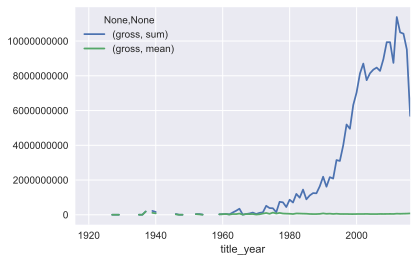

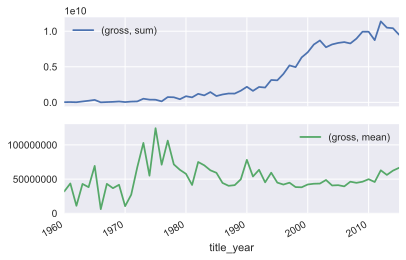

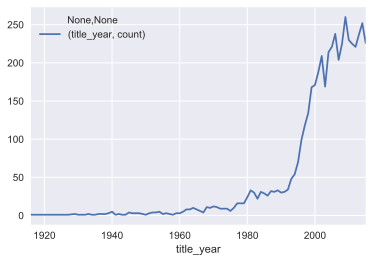

In [5]:
#посмотрим изменение кассовых сборов по годам
#задаем формат вывода данных в фрейме (до 3 знаков после запятой)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#выбираем стобцы gross и title_year и смотрим изменение суммарных сборов и средних сборов на один фильм по годам 
dfg1 = df1[['gross'] + ['title_year']].groupby('title_year').agg({'gross': ['sum', 'mean']})
dfg1.plot(); plt.ticklabel_format(style='plain')
#видим дырки на графике. Чтобы не заполнять эти дырки нулями, обрежем датафрейм 1960 годом с нижней границы и 
#2015 с верхней (насколько я понимаю фрейм снят в 2016 году и полной информации по этому году еще не поступало)
dfg1 = df1.loc[(df1['title_year'] >= 1960) & (df1['title_year'] < 2016)]\
[[x for x in df1.columns if (x == 'gross')] + ['title_year']]\
.groupby('title_year').agg({'gross' : ['sum', 'mean']})

#Строим график с сабплотами - видим, что усредненные кассовые сборы на один фильм за год - величины примерно одного порядка ,
#Интересно, что "пик" кассовых сборов на фильм приходится на 70-е годы


dfg1.plot(subplots=True);plt.ticklabel_format(style='plain')

#Под конец глянем сколько фильмов за каждый год в нашем фрейме 
dfg1 = df1.loc[(df1['title_year'] >= 1900) & (df1['title_year'] < 2016)]\
[['title_year']].groupby('title_year').agg({'title_year': ['count']})
dfg1.plot()


/Users/Feldman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


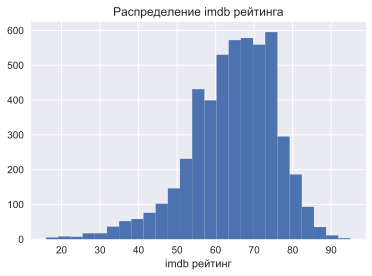

In [6]:
#Возьмем колонку с рейтингом и умножим ее на 10 для большой точности распределения на гистограмме
dfg2 = df1[['imdb_score'] + ['color']]
#dfg2['imdb_score'] = dfg2[['imdb_score']] * 10
dfg2['imdb_score'] = dfg2.loc[:,'imdb_score'] * 10
ax = dfg2.imdb_score.hist(bins = 25)
ax.set_title('Распределение imdb рейтинга')
ax.set_xlabel('imdb рейтинг')


In [7]:
#Вытащим черно-белые картины и цветные, посмотрим распределение imdb-рейтинга
dfg2_bw = dfg2.loc[(dfg2['color'] == ' Black and White')]
dfg2_cr = dfg2.loc[(dfg2['color'] == 'Color')]



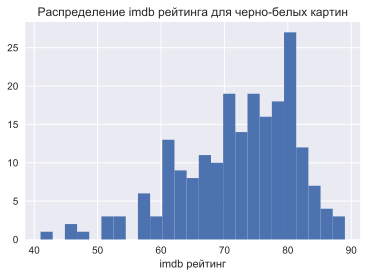

In [8]:
ax = dfg2_bw.imdb_score.hist(bins = 25)
ax.set_title('Распределение imdb рейтинга для черно-белых картин')
ax.set_xlabel('imdb рейтинг')

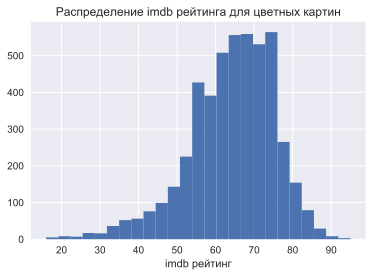

In [9]:
ax = dfg2_cr.imdb_score.hist(bins = 25)
ax.set_title('Распределение imdb рейтинга для цветных картин')
ax.set_xlabel('imdb рейтинг')

In [10]:
dfg3 = dfMain[['gross'] + ['imdb_score'] +  ['director_facebook_likes'] + ['director_name']].groupby('director_name')\
.agg({'gross':['sum', 'mean'],'director_facebook_likes' :'sum', 'director_name' : 'count', 'imdb_score' : 'mean'}).fillna(0)

dfg3 = dfg3.loc[(dfg3[('director_name', 'count')]) >= 3]
dfg3_sum = dfg3[[('gross', 'sum')]]\
.sort_values([('gross', 'sum')], ascending=False)
dfg3_mean = dfg3[[('gross', 'mean')]]\
.sort_values([('gross', 'mean')], ascending=False)

dfg3_fb = dfg3[[('director_facebook_likes', 'sum')]]\
.sort_values([('director_facebook_likes', 'sum')], ascending=False)
#dfg3_fb 
dfg3_imdb = dfg3[[('imdb_score', 'mean')]]\
.sort_values([('imdb_score', 'mean')], ascending=False)


In [11]:
dfg3.sort_values([('gross', 'sum')], ascending=False).head(10)\
.style.bar(subset=[('gross', 'sum')], color = '#d65f5f')

In [12]:
dfg3.sort_values([('gross', 'mean')], ascending=False).head(10)\
.style.bar(subset=[('gross', 'mean')], color = '#d67b5f')



In [13]:
dfg3.sort_values([('imdb_score', 'mean')], ascending=False).head(10)\
.style.bar(subset=[('imdb_score', 'mean')], color = '#b68b5f')

In [14]:

%config InlineBackend.figure_format = 'png' 

In [15]:

df4= df1[['imdb_score', 'movie_facebook_likes', 'budget', 'gross', 'movie_title']].fillna(0)
df4['income'] = df4['gross'] - df4['budget']
#df4.info()
dfg4 = df4.select_dtypes(include=['int64','float64'])
#df4.sort_values('budget', ascending=False)
#sns.pairplot(dfg4)


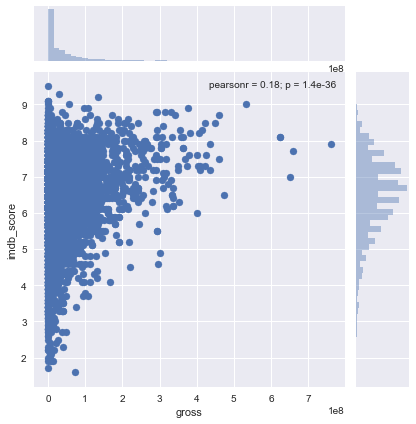

In [16]:
sns.jointplot(x='gross', y='imdb_score', 
              data=dfg4, kind='scatter');

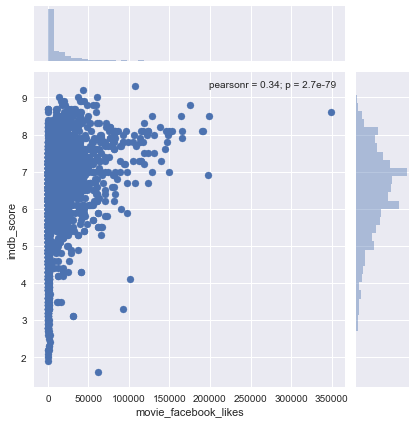

In [17]:
sns.jointplot(x='movie_facebook_likes', y='imdb_score', 
              data=dfg4.loc[(dfg4['movie_facebook_likes'] > 0)], kind='scatter');


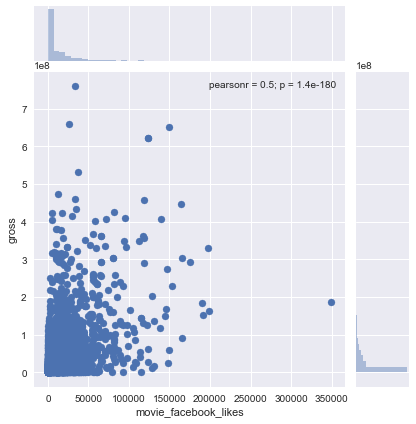

In [18]:
sns.jointplot(x='movie_facebook_likes', y='gross', 
              data=dfg4.loc[(dfg4['movie_facebook_likes'] > 0)], kind='scatter');

In [19]:

df5 = df1[['color', 'movie_title', 'title_year']]
df5 = df5.loc[(df5['color'] == 'Color') | (df5['color'] == ' Black and White')]
#df5_1 = df5.groupby(['title_year', 'color'], as_index=False)[['movie_title']].count()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11ceba630>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x119170550>], dtype=object)

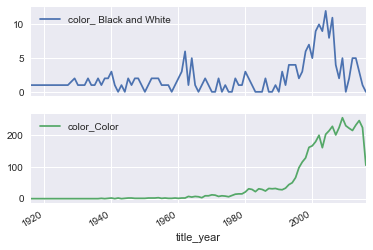

In [24]:
#Воспользуемся get_dummies для формирования нового фрейма
df5_new = pd.get_dummies(df5, columns=['color'])
df5_new = df5_new.groupby('title_year').agg({'color_ Black and White' : 'sum', 'color_Color':'sum'})

df5_new.plot(subplots=True)

#Наблюдаем интересный увеличение количества снятых черно-белых картин в 2000-е годы. Может быть связано с расцветом 
# 'авторского' кино

In [34]:
init_notebook_mode(connected=True)

trace0 = go.Scatter(
    x=df5_new.index,
    y=df5_new.color_Color,
    name='Цветные'
)

trace1 = go.Scatter(
    x=df5_new.index,
    y=df5_new['color_ Black and White'],
    name='Черно-белые'
)

data = [trace0, trace1]
layout = {'title': 'Статистика по производству цветных фильмов'}

fig = go.Figure(data=data, layout=layout)

iplot(fig) #, show_link=False)
